# UAS SAINS DATA CONSULTING

**Kelompok 2 (Case AXA: Recommender System for Insurance Products)**
1. Bela Sonia (164221004)
2. Adi Jalu Pratomo	(164221049)
3. Aura Najma Kustiananda (164221053)
4. Jovita Suryo Angeline (164221094)
5. Kania Putri Octavia (164221111)

## LIBRARY DAN IMPOR DATA

In [2]:
# 📊 Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns

# 📈 Preprocessing dan Transformasi Fitur
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# 🧠 Modeling dan Algoritma Machine Learning
# — Klasifikasi dan Regresi
from sklearn.ensemble import RandomForestRegressor

# — Clustering
from sklearn.cluster import KMeans

# — Neighbor-based Learning
from sklearn.neighbors import NearestNeighbors

# 🧪 Evaluasi Model
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.metrics.pairwise import cosine_similarity

# 🔁 Training dan Validasi
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split

# 🔧 Utility / Tools
import numpy as np
import pandas as pd
import joblib
import umap


c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_excel('Insurance Data.xlsx')
df.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,...,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,...,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,NaN,...,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,...,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,...,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,...,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B


## EKSPLORASI DATA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        142500 non-null  object        
 6   Education Level                     142500 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     142500 non-null  object        
 10  Purchase

### CEK OUTLIER


No significant outliers detected in 'Age' using IQR method.

No significant outliers detected in 'Interactions with Customer Service' using IQR method.

No significant outliers detected in 'Coverage Amount' using IQR method.

No significant outliers detected in 'Premium Amount' using IQR method.

No significant outliers detected in 'Deductible' using IQR method.

No significant outliers detected in 'Credit Score' using IQR method.


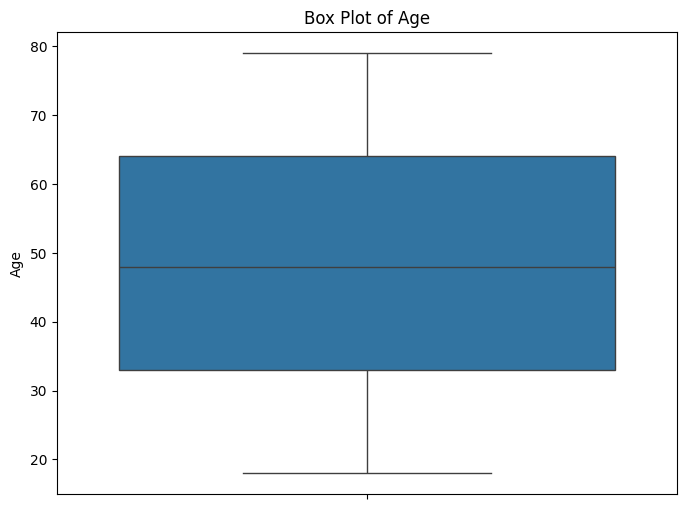

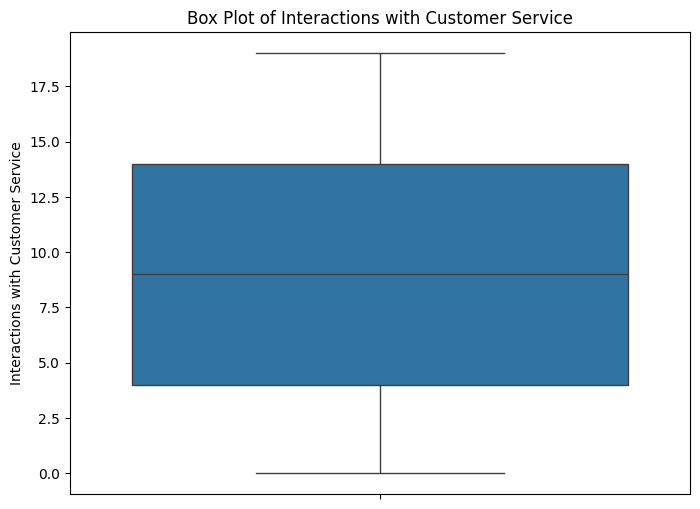

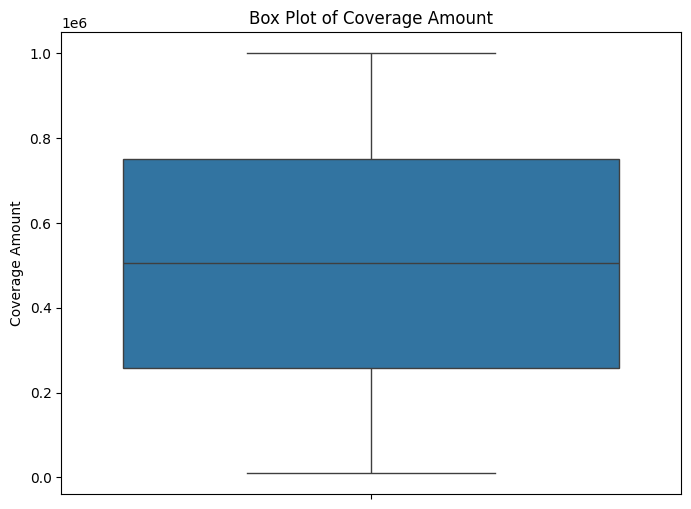

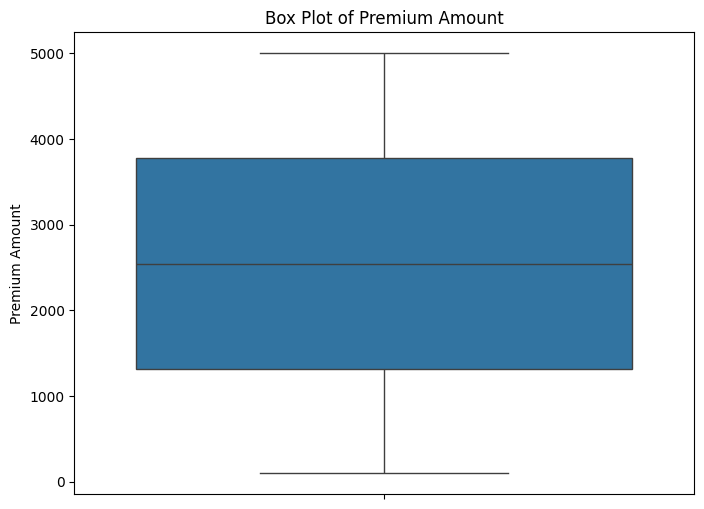

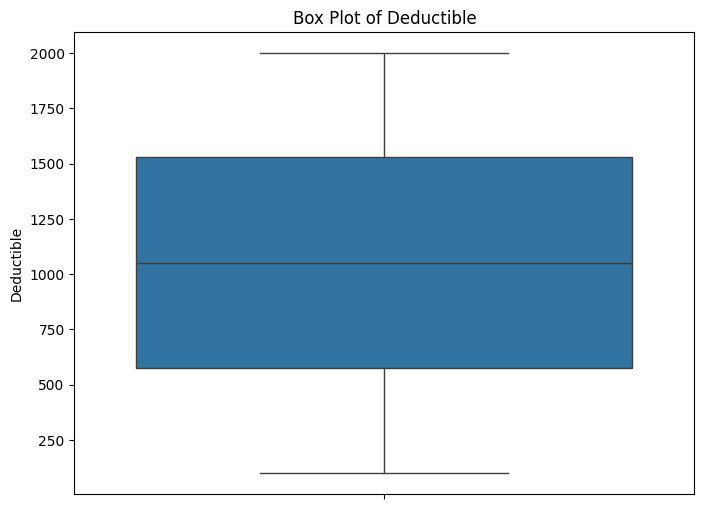

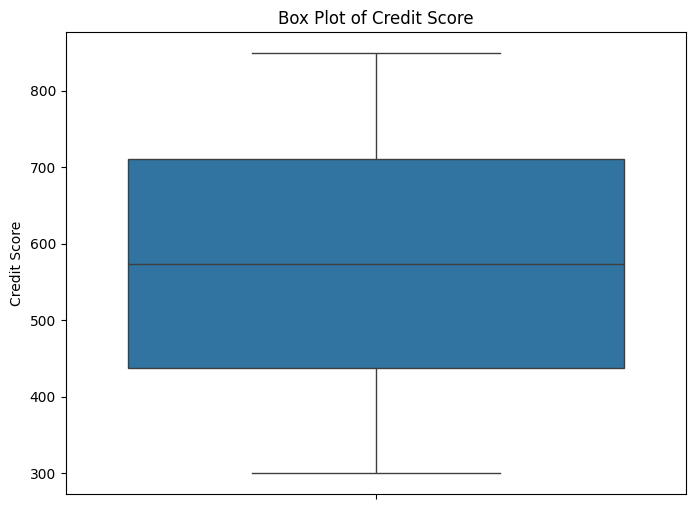

In [6]:
import matplotlib.pyplot as plt
def detect_outliers_iqr(df, column):
  """
    Detects outliers in a non-categorical column using the Interquartile Range (IQR) method.

    Args:
      df: pandas DataFrame.
      column: The name of the non-categorical column to check for outliers.

    Returns:
      A DataFrame containing the outlier values and their indices.
    """
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  return outliers[['Customer ID', column]]

non_categorical_columns = ['Age', 'Interactions with Customer Service', 'Coverage Amount', 'Premium Amount', 'Deductible', 'Credit Score']

for col in non_categorical_columns:
  outliers_df = detect_outliers_iqr(df, col)
  if not outliers_df.empty:
    print(f"\nOutliers detected in '{col}':")
    print(outliers_df)
  else:
    print(f"\nNo significant outliers detected in '{col}' using IQR method.")

for col in non_categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(y=df[col])
  plt.title(f'Box Plot of {col}')
  plt.ylabel(col)
  plt.show()

### HANDLING MISSING VALUES

In [7]:
df_prepro = df.copy()

In [8]:
missing_info_prepro = df_prepro.isnull().sum()
missing_info_prepro = missing_info_prepro[missing_info_prepro > 0]

if not missing_info_prepro.empty:
  missing_percentage_prepro = (missing_info_prepro / len(df_prepro)) * 100
  missing_count_prepro = missing_info_prepro
  missing_summary_prepro = pd.DataFrame({
      'Missing Count': missing_count_prepro,
      'Missing Percentage': missing_percentage_prepro
  })
  print("Missing Values Information (df_prepro):")
  print(missing_summary_prepro)
else:
  print("No missing values found in df_prepro.")

Missing Values Information (df_prepro):
                 Missing Count  Missing Percentage
Income Level              7500            5.000000
Education Level           7500            5.000000
Behavioral Data           7500            5.000000
Claim History             7500            5.000000
Risk Profile              7500            5.000000
Life Events              25166           16.777333


In [ ]:

cols_with_missing = missing_percentage[missing_percentage > 0].index.tolist()
df_with_missing_cols = df_prepro[cols_with_missing]

cols_without_missing = missing_percentage[missing_percentage == 0].index.tolist()
df_without_missing_cols = df_prepro[cols_without_missing]

print("\nDataFrame dengan kolom yang memiliki missing values:")
df_with_missing_cols.head()




DataFrame dengan kolom yang memiliki missing values:


,Income Level,Education Level,Behavioral Data,Claim History,Risk Profile,Life Events
0,Medium,High School,Inactive,3+ Claims,Low,Retirement
1,Medium,Master,NaN,No Claims,Low,Divorce
2,Low,High School,Occasional,No Claims,Medium,Divorce
3,High,Bachelor,Active,No Claims,Low,Marriage
4,Medium,PhD,Active,1-2 Claims,Low,Childbirth


In [10]:
print("\nDataFrame dengan kolom yang tidak memiliki missing values:")
df_without_missing_cols.head()


DataFrame dengan kolom yang tidak memiliki missing values:


""
0
1
2
3
4


In [11]:
print("\n▶ Imputing Life Events as 'No Event' + creating flag...")

# Hitung jumlah missing sebelum isi
count_life = df_prepro["Life Events"].isna().sum()

# Buat flag sebelum mengisi
df_prepro["LifeEvent_Missing"] = df_prepro["Life Events"].isna().astype(int)

# Imputasi missing value
df_prepro["Life Events"].fillna("No Event", inplace=True)

print(f" → Isi {count_life} baris Life Events dengan 'No Event' dan tandai dengan flag 'LifeEvent_Missing'")



▶ Imputing Life Events as 'No Event' + creating flag...
 → Isi 25166 baris Life Events dengan 'No Event' dan tandai dengan flag 'LifeEvent_Missing'


C:\Users\Acer\AppData\Local\Temp\ipykernel_26464\3709351294.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Life Events"].fillna("No Event", inplace=True)


In [12]:
print("\n▶ Imputing Claim History berdasarkan Previous Claims History:")

# 0 klaim sebelumnya → No Claims
count_0 = df_prepro[(df_prepro["Claim History"].isna()) & (df_prepro["Previous Claims History"] == 0)].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) & (df_prepro["Previous Claims History"] == 0),
    "Claim History"
] = "No Claims"
print(f" → Previous Claims = 0: isi 'No Claims' untuk {count_0} baris")

# 1–2 klaim sebelumnya → 1-2 Claims
count_12 = df_prepro[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"].isin([1, 2]))
].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"].isin([1, 2])),
    "Claim History"
] = "1-2 Claims"
print(f" → Previous Claims = 1 or 2: isi '1-2 Claims' untuk {count_12} baris")

# 3+ klaim sebelumnya → 3+ Claims (anggap >=3)
count_3plus = df_prepro[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"] >= 3)
].shape[0]
df_prepro.loc[
    (df_prepro["Claim History"].isna()) &
    (df_prepro["Previous Claims History"] >= 3),
    "Claim History"
] = "3+ Claims"
print(f" → Previous Claims >= 3: isi '3+ Claims' untuk {count_3plus} baris")


▶ Imputing Claim History berdasarkan Previous Claims History:
 → Previous Claims = 0: isi 'No Claims' untuk 1541 baris
 → Previous Claims = 1 or 2: isi '1-2 Claims' untuk 2890 baris
 → Previous Claims >= 3: isi '3+ Claims' untuk 3069 baris


In [13]:
print("\n▶ Imputing Behavioral Data as 'Unknown'...")
count = df_prepro["Behavioral Data"].isna().sum()
df_prepro["Behavioral Data"].fillna("Unknown", inplace=True)
print(f" → Isi {count} baris dengan 'Unknown'")


▶ Imputing Behavioral Data as 'Unknown'...
 → Isi 7500 baris dengan 'Unknown'


C:\Users\Acer\AppData\Local\Temp\ipykernel_26464\2041690831.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prepro["Behavioral Data"].fillna("Unknown", inplace=True)


In [14]:

missing_info_prepro_after = df_prepro.isnull().sum()
missing_info_prepro_after = missing_info_prepro_after[missing_info_prepro_after > 0]

if not missing_info_prepro_after.empty:
  missing_percentage_prepro_after = (missing_info_prepro_after / len(df_prepro)) * 100
  missing_count_prepro_after = missing_info_prepro_after
  missing_summary_prepro_after = pd.DataFrame({
      'Missing Count': missing_count_prepro_after,
      'Missing Percentage': missing_percentage_prepro_after
  })
  print("Missing Values Information (df_prepro) After Imputation:")
  print(missing_summary_prepro_after)
else:
  print("No missing values found in df_prepro after imputation.")

Missing Values Information (df_prepro) After Imputation:
                 Missing Count  Missing Percentage
Income Level              7500                 5.0
Education Level           7500                 5.0
Risk Profile              7500                 5.0


In [15]:
print("\n▶ Imputasi Income Level berdasarkan kombinasi Education Level + Occupation:")

# Imputasi kombinasi Education Level + Occupation
for edu in df_prepro["Education Level"].dropna().unique():
    for occ in df_prepro["Occupation"].dropna().unique():
        mask_all = (df_prepro["Education Level"] == edu) & (df_prepro["Occupation"] == occ)
        mask_missing = mask_all & df_prepro["Income Level"].isna()
        mode_val = df_prepro[mask_all]["Income Level"].mode()

        if not mode_val.empty:
            count = mask_missing.sum()
            df_prepro.loc[mask_missing, "Income Level"] = mode_val[0]
            if count > 0:
                print(f" → Edu='{edu}', Occ='{occ}' → isi Income Level='{mode_val[0]}' untuk {count} baris")

# Imputasi fallback jika Education Level kosong → hanya berdasarkan Occupation
print("\n▶ Fallback imputasi Income Level berdasarkan Occupation saja (jika Education Level kosong):")

for occ in df_prepro["Occupation"].dropna().unique():
    mask_all = (df_prepro["Occupation"] == occ) & (df_prepro["Education Level"].isna())
    mask_missing = mask_all & df_prepro["Income Level"].isna()
    mode_val = df_prepro[mask_all]["Income Level"].mode()

    if not mode_val.empty:
        count = mask_missing.sum()
        df_prepro.loc[mask_missing, "Income Level"] = mode_val[0]
        if count > 0:
            print(f" → Occ='{occ}' (Edu kosong) → isi Income Level='{mode_val[0]}' untuk {count} baris")



▶ Imputasi Income Level berdasarkan kombinasi Education Level + Occupation:
 → Edu='High School', Occ='Student' → isi Income Level='Medium' untuk 228 baris
 → Edu='High School', Occ='Retired' → isi Income Level='Medium' untuk 215 baris
 → Edu='High School', Occ='Business Owner' → isi Income Level='Medium' untuk 240 baris
 → Edu='High School', Occ='Teacher' → isi Income Level='Medium' untuk 204 baris
 → Edu='High School', Occ='Engineer' → isi Income Level='Medium' untuk 210 baris
 → Edu='High School', Occ='Unemployed' → isi Income Level='Medium' untuk 240 baris
 → Edu='High School', Occ='Lawyer' → isi Income Level='Medium' untuk 210 baris
 → Edu='High School', Occ='Doctor' → isi Income Level='Medium' untuk 205 baris
 → Edu='Master', Occ='Student' → isi Income Level='Medium' untuk 212 baris
 → Edu='Master', Occ='Retired' → isi Income Level='Medium' untuk 227 baris
 → Edu='Master', Occ='Business Owner' → isi Income Level='Medium' untuk 216 baris
 → Edu='Master', Occ='Teacher' → isi Incom

In [16]:
print("\n▶ Imputing Education Level berdasarkan Occupation:")

for occ in df_prepro["Occupation"].dropna().unique():
    mode_edu = df_prepro[df_prepro["Occupation"] == occ]["Education Level"].mode()
    if not mode_edu.empty:
        count = df_prepro[(df_prepro["Education Level"].isna()) & (df_prepro["Occupation"] == occ)].shape[0]
        df_prepro.loc[
            (df_prepro["Education Level"].isna()) & (df_prepro["Occupation"] == occ),
            "Education Level"
        ] = mode_edu[0]
        if count > 0:
            print(f" → Occupation = '{occ}': isi Education Level dengan '{mode_edu[0]}' untuk {count} entri")



▶ Imputing Education Level berdasarkan Occupation:
 → Occupation = 'Student': isi Education Level dengan 'High School' untuk 912 entri
 → Occupation = 'Retired': isi Education Level dengan 'Master' untuk 955 entri
 → Occupation = 'Business Owner': isi Education Level dengan 'Bachelor' untuk 951 entri
 → Occupation = 'Teacher': isi Education Level dengan 'PhD' untuk 994 entri
 → Occupation = 'Engineer': isi Education Level dengan 'Master' untuk 948 entri
 → Occupation = 'Unemployed': isi Education Level dengan 'Bachelor' untuk 920 entri
 → Occupation = 'Lawyer': isi Education Level dengan 'Bachelor' untuk 932 entri
 → Occupation = 'Doctor': isi Education Level dengan 'PhD' untuk 888 entri


In [17]:
print("\n▶ Imputing Risk Profile berdasarkan Driving Record:")

for dr in df_prepro["Driving Record"].dropna().unique():
    mode_risk = df_prepro[df_prepro["Driving Record"] == dr]["Risk Profile"].mode()
    if not mode_risk.empty:
        count = df_prepro[(df_prepro["Risk Profile"].isna()) & (df_prepro["Driving Record"] == dr)].shape[0]
        df_prepro.loc[
            (df_prepro["Risk Profile"].isna()) & (df_prepro["Driving Record"] == dr),
            "Risk Profile"
        ] = mode_risk[0]
        if count > 0:
            print(f" → Driving Record = '{dr}': isi Risk Profile dengan '{mode_risk[0]}' untuk {count} entri")



▶ Imputing Risk Profile berdasarkan Driving Record:
 → Driving Record = 'Minor Violations': isi Risk Profile dengan 'Low' untuk 2487 entri
 → Driving Record = 'Clean': isi Risk Profile dengan 'Low' untuk 2562 entri
 → Driving Record = 'Major Violations': isi Risk Profile dengan 'Low' untuk 2451 entri


In [18]:
missing_info_prepro = df_prepro.isnull().sum()
missing_info_prepro = missing_info_prepro[missing_info_prepro > 0]

if not missing_info_prepro.empty:
  missing_percentage_prepro = (missing_info_prepro / len(df_prepro)) * 100
  missing_count_prepro = missing_info_prepro
  missing_summary_prepro = pd.DataFrame({
      'Missing Count': missing_count_prepro,
      'Missing Percentage': missing_percentage_prepro
  })
  print("Missing Values Information (df_prepro):")
  print(missing_summary_prepro)
else:
  print("No missing values found in df_prepro.")

No missing values found in df_prepro.


In [20]:
df_prepro = df_prepro.drop(columns=['LifeEvent_Missing'])

In [21]:
df_prepro.to_excel('df_prepro_fix.xlsx', index=False)

### FEATURE ENGINEERING

In [22]:
df_fe = df_prepro.copy()

In [24]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 30 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [27]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

categorical_cols = df_fe.select_dtypes(include='object').columns
data = []

for col in categorical_cols:
    unique_vals = df_fe[col].unique()
    if col.lower() == 'location':
        preview = unique_vals[:5]
        note = f"... total {len(unique_vals)} values (only 5 shown)"
    else:
        preview = unique_vals[:12] if len(unique_vals) > 12 else unique_vals
        note = f"... total {len(unique_vals)} values" if len(unique_vals) > 12 else f"{len(unique_vals)} values"
    
    data.append({
        'Column': col,
        'Unique Values (preview)': ', '.join(map(str, preview)),
        'Total Unique': note
    })

df_unique = pd.DataFrame(data)
df_unique

,Column,Unique Values (preview),Total Unique
0,Customer ID,"CUST000001, CUST000002, CUST000003, CUST000004, CUST000005, CUST000006, CUST000007, CUST000008, CUST000009, CUST000010, CUST000011, CUST000012",... total 150000 values
1,Gender,"Female, Male, Non-Binary",3 values
2,Marital Status,"Married, Divorced, Widowed, Single",4 values
3,Occupation,"Student, Retired, Business Owner, Teacher, Engineer, Unemployed, Lawyer, Doctor",8 values
4,Income Level,"Medium, Low, High, Very High",4 values
5,Education Level,"High School, Master, Bachelor, PhD",4 values
6,Geographic Information,"Suburban, Urban, Rural",3 values
7,Location,"West Lisa, Tyroneville, Jaredbury, Johnhaven, Davidton",... total 47051 values (only 5 shown)
8,Behavioral Data,"Inactive, Unknown, Occasional, Active, New",5 values
9,Purchase History,"Frequent, One-time, Infrequent",3 values


#### FEATURE ENGINEERING UMUM

In [ ]:
df_fe["Tenure_Days"] = (pd.Timestamp("2025-05-24") - df_fe["Policy Start Date"]).dt.days

In [30]:
df_fe["Days_Since_Renewal"] = (pd.Timestamp("2025-05-24") - df_fe["Policy Renewal Date"]).dt.days

In [31]:
df_fe["Interaction_Rate"] = df_fe["Interactions with Customer Service"] / (df_fe["Tenure_Days"] + 1)

In [32]:
df_fe["Deductible_Coverage_Ratio"] = df_fe["Deductible"] / (df_fe["Coverage Amount"] + 1)


In [49]:
df_fe["Premium_Coverage_Ratio"] = df_fe["Premium Amount"] / (df_fe["Coverage Amount"] + 1)


In [33]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 34 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [34]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733


#### FEATURE ENGINEERING KHUSUS LOCATION

In [35]:
df_fe['Location']

0                  West Lisa
1                Tyroneville
2                  Jaredbury
3                  Johnhaven
4                   Davidton
                 ...        
149995            Bensonview
149996            East Brian
149997             Tammyfort
149998           Goodwinstad
149999    Fitzpatrickchester
Name: Location, Length: 150000, dtype: object

In [ ]:
prefix_groups = {
    "North ": "north",
    "South ": "south",
    "East ": "east",
    "West ": "west",
    "Lake ": "lake",
    "New ": "new",
    "Port ": "port"
}
suffix_groups = {
    "_ville": "ville",
    "_town": "town",
    "_burg": "burg",
    "_burgh": "burg",
    "_fort": "fort",
    "_mouth": "mouth",
    "_land": "land",
    "_view": "view",
    "_chester": "chester",
    "_port": "port",
    "_shire": "shire",
    "_ton": "ton",
    "_bury": "bury",
    "_stad": "stad",
    "_haven": "haven",
    "_furt": "furt",
    "_borough": "borough",
    "_berg": "berg",
    "_side": "side"
}

# Inisialisasi ulang kolom kategori lokasi
df_fe["Location_Group"] = None

# Awalan nama kota
for prefix, label in prefix_groups.items():
    df_fe.loc[df_fe["Location"].str.startswith(prefix), "Location_Group"] = label

# Akhiran nama kota (untuk yang belum masuk prefix)
for suffix, label in suffix_groups.items():
    mask = df_fe["Location_Group"].isna() & df_fe["Location"].str.endswith(suffix.replace("_", ""))
    df_fe.loc[mask, "Location_Group"] = label

In [37]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Group
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,west
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,ville
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,bury
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,haven
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,ton


In [38]:
uncategorized = df_fe[df_fe["Location_Group"].isna()]["Location"].unique().tolist()
print(uncategorized)

[]


In [39]:
# Mapping ulang berdasarkan revisi
location_geog_group_map = {
    "north": "regional",
    "south": "regional",
    "east": "regional",
    "west": "regional",
    "port": "coastal",
    "mouth": "coastal",
    "haven": "coastal",
    "lake": "landscape",
    "shire": "landscape",
    "side": "landscape",
    "view": "landscape",
    "land": "landscape",
    "fort": "historic",
    "burg": "historic",
    "burgh": "historic",
    "stad": "historic",
    "chester": "historic",
    "borough": "historic",
    "bury": "historic",
    "ton": "historic",
    "ville": "historic",
    "furt": "historic",
    "new": "new_settlement"
}

# Buat kolom Location_Type
df_fe["Location_Type"] = df_fe["Location_Group"].map(location_geog_group_map).fillna("other")


In [40]:
df_fe.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Location,Behavioral Data,Purchase History,Policy Start Date,Policy Renewal Date,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Group,Location_Type
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,West Lisa,Inactive,Frequent,2023-01-16,2024-08-22,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,west,regional
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Tyroneville,Unknown,One-time,2022-03-21,2024-11-07,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,ville,historic
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Jaredbury,Occasional,Infrequent,2020-10-21,2024-12-20,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,bury,historic
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Johnhaven,Active,One-time,2021-09-02,2024-07-29,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,haven,coastal
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Davidton,Active,Infrequent,2020-11-10,2025-02-27,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,ton,historic


In [41]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype         
---  ------                              --------------   -----         
 0   Customer ID                         150000 non-null  object        
 1   Age                                 150000 non-null  int64         
 2   Gender                              150000 non-null  object        
 3   Marital Status                      150000 non-null  object        
 4   Occupation                          150000 non-null  object        
 5   Income Level                        150000 non-null  object        
 6   Education Level                     150000 non-null  object        
 7   Geographic Information              150000 non-null  object        
 8   Location                            150000 non-null  object        
 9   Behavioral Data                     150000 non-null  object        
 10  Purchase

In [42]:
df_fe = df_fe.drop('Location_Group', axis=1)

In [50]:
df_fe = df_fe.drop('Location', axis=1)

In [ ]:

df_fe = df_fe.drop(columns=['Policy Start Date', 'Policy Renewal Date'])

In [61]:
df_fe["Previous Claims History"] = df_fe["Previous Claims History"].astype(str)


In [62]:
df_fe.to_excel('df_fe_fix.xlsx', index=False)

## ENCODING

In [63]:
final_data = pd.read_excel('df_fe_fix.xlsx')
final_data.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Active,One-time,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,coastal,0.001727
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258


In [65]:
final_data.describe()

,Age,Interactions with Customer Service,Coverage Amount,Premium Amount,Deductible,Previous Claims History,Credit Score,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Premium_Coverage_Ratio
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,48.447300,9.470887,504721.832553,2545.394752,1051.883134,1.996993,573.902347,1100.461060,186.543187,0.010366,0.004893,0.011822
std,17.909818,5.770120,285601.378292,1416.633851,549.612108,1.412996,158.736283,422.085725,105.708894,0.008613,0.010813,0.026461
min,18.000000,0.000000,10001.000000,100.000000,100.010000,0.000000,300.000000,371.000000,4.000000,0.000000,0.000103,0.000101
25%,33.000000,4.000000,257402.250000,1315.745000,575.762500,1.000000,437.000000,735.000000,95.000000,0.004058,0.001138,0.002606
50%,48.000000,9.000000,504612.500000,2545.035000,1050.305000,2.000000,573.000000,1100.000000,187.000000,0.008584,0.002082,0.005040
75%,64.000000,14.000000,751412.000000,3772.140000,1529.880000,3.000000,711.000000,1467.000000,278.000000,0.013991,0.004086,0.009903
max,79.000000,19.000000,999996.000000,4999.960000,1999.990000,4.000000,849.000000,1831.000000,369.000000,0.051075,0.197062,0.478877


In [66]:
numerical_features = [
    'Age', 'Coverage Amount', 'Premium Amount', 'Deductible',
    'Credit Score', 'Tenure_Days', 'Interaction_Rate',
    'Premium_Coverage_Ratio', 'Deductible_Coverage_Ratio', 'Days_Since_Renewal', 'Interactions with Customer Service',
]

In [67]:
# Ambil semua kolom non-numerik
non_numerical_cols = df_fe.select_dtypes(exclude=['number']).columns

# Kecualikan kolom 'Customer ID' dan juga kolom numerik
target_cols = [col for col in non_numerical_cols if col != 'Customer ID' and col not in numerical_features]

# Buat DataFrame modus
mode_data = {col: df_fe[col].mode()[0] for col in target_cols}
df_mode = pd.DataFrame([mode_data])
df_mode

,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Insurance Products Owned,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Driving Record,Life Events,Segmentation Group,Location_Type
0,Male,Married,Retired,Medium,Bachelor,Urban,Inactive,Frequent,3+ Claims,Home,Monthly,Eco-Friendly,App Notification,Afternoon,English,Low,2,Major Violations,No Event,C,regional


In [69]:
final_data["Previous Claims History"] = final_data["Previous Claims History"].astype(str)


In [70]:
# Deteksi kolom non-numerik dari final_data
all_cols = final_data.columns.tolist()
non_numeric_cols = [col for col in all_cols if col not in numerical_features and col != 'Customer ID']

category_values = {col: final_data[col].unique().tolist() for col in non_numeric_cols}

# Cetak semua value unik untuk masing-masing kolom
for col, values in category_values.items():
    print(f"{col} ({len(values)} values): {values}")

Gender (3 values): ['Female', 'Male', 'Non-Binary']
Marital Status (4 values): ['Married', 'Divorced', 'Widowed', 'Single']
Occupation (8 values): ['Student', 'Retired', 'Business Owner', 'Teacher', 'Engineer', 'Unemployed', 'Lawyer', 'Doctor']
Income Level (4 values): ['Medium', 'Low', 'High', 'Very High']
Education Level (4 values): ['High School', 'Master', 'Bachelor', 'PhD']
Geographic Information (3 values): ['Suburban', 'Urban', 'Rural']
Behavioral Data (5 values): ['Inactive', 'Unknown', 'Occasional', 'Active', 'New']
Purchase History (3 values): ['Frequent', 'One-time', 'Infrequent']
Claim History (3 values): ['3+ Claims', 'No Claims', '1-2 Claims']
Insurance Products Owned (6 values): ['Life', 'Home', 'Multiple', 'Health', 'Travel', 'Auto']
Policy Type (4 values): ['Quarterly', 'Semi-Annual', 'Monthly', 'Annual']
Customer Preferences (4 values): ['Eco-Friendly', 'Fast Service', 'Comprehensive Coverage', 'Low Cost']
Preferred Communication Channel (4 values): ['SMS', 'Email', '

In [71]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         150000 non-null  object 
 1   Age                                 150000 non-null  int64  
 2   Gender                              150000 non-null  object 
 3   Marital Status                      150000 non-null  object 
 4   Occupation                          150000 non-null  object 
 5   Income Level                        150000 non-null  object 
 6   Education Level                     150000 non-null  object 
 7   Geographic Information              150000 non-null  object 
 8   Behavioral Data                     150000 non-null  object 
 9   Purchase History                    150000 non-null  object 
 10  Claim History                       150000 non-null  object 
 11  Interactions with Customer

In [72]:
# ========== Fitur Per Kategori ==========


ordinal_features = [
    'Education Level', 'Income Level', 'Behavioral Data',
    'Policy Type', 'Purchase History', 'Risk Profile', 'Driving Record'
]

onehot_features = [
    'Gender', 'Marital Status', 'Geographic Information',
    'Preferred Communication Channel', 'Preferred Contact Time'
]

label_features = [
    'Occupation', 'Customer Preferences', 'Previous Claims History', 'Claim History',
    'Life Events', 'Segmentation Group', 'Location_Type', 'Preferred Language'
]

# ========== ColumnTransformer ==========
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('ord', OrdinalEncoder(), ordinal_features),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), onehot_features),
    ('label', OrdinalEncoder(), label_features)
], remainder='passthrough')  


In [ ]:
df_encode = final_data.copy()
# Kolom yang ingin DIKECUALIKAN dari label encoding
excluded_cols = ['Customer ID', 'Insurance Products Owned']

# Terapkan transformasi ke df_encode tanpa kolom yang dikecualikan
X_raw = df_encode.drop(columns=excluded_cols)
X_transformed = preprocessor.fit_transform(X_raw)

# Buat nama kolom hasil one-hot secara manual
onehot_encoder = preprocessor.named_transformers_['onehot']
onehot_feature_names = onehot_encoder.get_feature_names_out(onehot_features)

# Gabungkan semua nama kolom hasil encoding
final_column_names = (
    numerical_features +
    ordinal_features +
    onehot_feature_names.tolist() +
    label_features +
    [col for col in X_raw.columns if col not in (numerical_features + ordinal_features + onehot_features + label_features)]
)

# Buat DataFrame hasil encoding
df_encoded = pd.DataFrame(X_transformed, columns=final_column_names)


In [138]:
ordinal_encoder = preprocessor.named_transformers_['ord']

for feature, categories in zip(ordinal_features, ordinal_encoder.categories_):
    print(f"{feature}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} → {i}")
    print()


Education Level:
  Bachelor → 0
  High School → 1
  Master → 2
  PhD → 3

Income Level:
  High → 0
  Low → 1
  Medium → 2
  Very High → 3

Behavioral Data:
  Active → 0
  Inactive → 1
  New → 2
  Occasional → 3
  Unknown → 4

Policy Type:
  Annual → 0
  Monthly → 1
  Quarterly → 2
  Semi-Annual → 3

Purchase History:
  Frequent → 0
  Infrequent → 1
  One-time → 2

Risk Profile:
  High → 0
  Low → 1
  Medium → 2

Driving Record:
  Clean → 0
  Major Violations → 1
  Minor Violations → 2



In [139]:
label_encoder = preprocessor.named_transformers_['label']

for feature, categories in zip(label_features, label_encoder.categories_):
    print(f"{feature}:")
    for i, cat in enumerate(categories):
        print(f"  {cat} → {i}")
    print()


Occupation:
  Business Owner → 0
  Doctor → 1
  Engineer → 2
  Lawyer → 3
  Retired → 4
  Student → 5
  Teacher → 6
  Unemployed → 7

Customer Preferences:
  Comprehensive Coverage → 0
  Eco-Friendly → 1
  Fast Service → 2
  Low Cost → 3

Previous Claims History:
  0 → 0
  1 → 1
  2 → 2
  3 → 3
  4 → 4

Claim History:
  1-2 Claims → 0
  3+ Claims → 1
  No Claims → 2

Life Events:
  Childbirth → 0
  Divorce → 1
  Job Change → 2
  Marriage → 3
  No Event → 4
  Retirement → 5

Segmentation Group:
  A → 0
  B → 1
  C → 2
  D → 3
  E → 4

Location_Type:
  coastal → 0
  historic → 1
  landscape → 2
  new_settlement → 3
  other → 4
  regional → 5

Preferred Language:
  English → 0
  French → 1
  Indonesian → 2
  Mandarin → 3
  Spanish → 4



In [74]:
# Ambil kolom yang sebelumnya di-exclude
df_excluded = df_encode[excluded_cols].reset_index(drop=True)

# Gabungkan dengan hasil encoded
df_encoded_final = pd.concat([df_excluded, df_encoded.reset_index(drop=True)], axis=1) 
df_encoded_final.head()
 

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
0,CUST000001,Life,-0.304153,-0.797124,-0.298176,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,-0.162772,0.836799,-0.774837,1.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,3.0
1,CUST000002,Life,-1.476698,-1.409381,1.682293,-0.489680,0.019515,0.143429,-0.204347,1.375665,0.255750,0.108381,0.091699,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,2.0,1.0,0.0,1.0,2.0
2,CUST000003,Home,0.812557,-0.126935,1.399728,0.422294,-1.158544,1.365933,-0.304023,-0.081476,-0.199059,-0.298398,0.611621,1.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,4.0
3,CUST000004,Multiple,0.645051,1.101249,-0.797883,0.819757,0.554996,0.617268,-0.095337,-0.381496,-0.282924,1.063838,0.611621,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,3.0,3.0,0.0,4.0
4,CUST000005,Health,0.365873,1.433850,0.951071,0.969299,-1.473533,1.318549,-0.013076,-0.285861,-0.292232,-0.951136,1.304850,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


## MEMISAHKAN NASABAH DENGAN MULTIPLE PRODUK ASURANSI DAN TIDAK

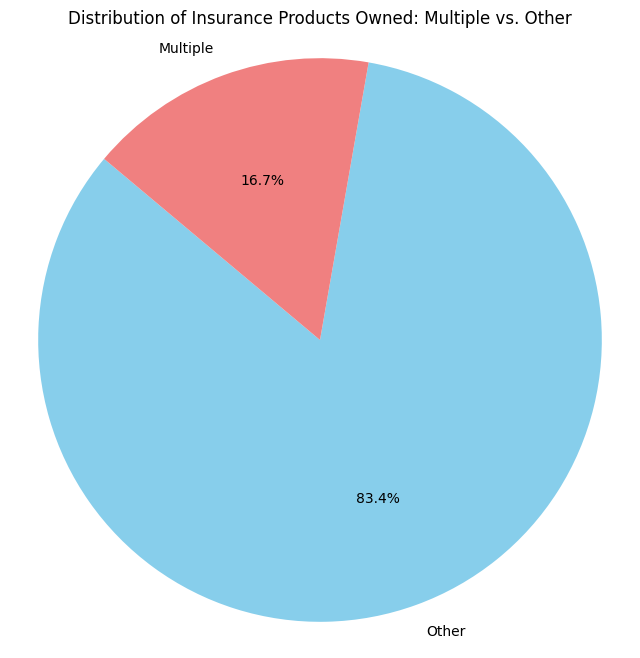

In [75]:

insurance_product_counts = df_encoded_final['Insurance Products Owned'].apply(lambda x: 'Multiple' if x == 'Multiple' else 'Other').value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(insurance_product_counts, labels=insurance_product_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Insurance Products Owned: Multiple vs. Other')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [76]:

df_multiple = df_encoded_final[df_encoded_final['Insurance Products Owned'] == 'Multiple'].copy()
df_other = df_encoded_final[df_encoded_final['Insurance Products Owned'] != 'Multiple'].copy()


In [77]:
df_multiple.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
3,CUST000004,Multiple,0.645051,1.101249,-0.797883,0.819757,0.554996,0.617268,-0.095337,-0.381496,-0.282924,1.063838,0.611621,0.0,0.0,0.0,1.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4.0,2.0,3.0,3.0,0.0,4.0
8,CUST000009,Multiple,0.700886,-1.020520,-1.248114,-0.076114,0.617993,0.911048,0.124710,-0.309034,-0.014527,-0.988976,1.304850,1.0,2.0,1.0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0
12,CUST000013,Multiple,-1.644204,1.081792,-0.095251,-1.149711,-0.566365,0.610160,-0.263752,-0.334820,-0.404790,-0.118658,0.265006,3.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,7.0,2.0,3.0,2.0,2.0,4.0,5.0,0.0
21,CUST000022,Multiple,1.482583,1.413402,-0.877177,-0.301801,0.504597,0.932370,-0.349240,-0.392576,-0.362324,-0.724097,0.265006,2.0,2.0,0.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,4.0,4.0,0.0,2.0
27,CUST000028,Multiple,-1.588369,1.394827,-0.762038,-1.039288,1.575560,0.581730,0.434154,-0.385432,-0.403301,-1.376835,1.651464,1.0,1.0,0.0,2.0,0.0,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,5.0,4.0,5.0,4.0


In [78]:
df_multiple.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24975 entries, 3 to 149995
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Customer ID                                       24975 non-null  object 
 1   Insurance Products Owned                          24975 non-null  object 
 2   Age                                               24975 non-null  float64
 3   Coverage Amount                                   24975 non-null  float64
 4   Premium Amount                                    24975 non-null  float64
 5   Deductible                                        24975 non-null  float64
 6   Credit Score                                      24975 non-null  float64
 7   Tenure_Days                                       24975 non-null  float64
 8   Interaction_Rate                                  24975 non-null  float64
 9   Premium_Coverage_Rati

In [79]:
df_multiple.to_excel('df_multiple_fix.xlsx', index=False)

In [80]:
df_other.to_excel('df_other_fix.xlsx', index=False)

## CLUSTERING

In [81]:
df_other.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language
0,CUST000001,Life,-0.304153,-0.797124,-0.298176,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,-0.162772,0.836799,-0.774837,1.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,3.0
1,CUST000002,Life,-1.476698,-1.409381,1.682293,-0.489680,0.019515,0.143429,-0.204347,1.375665,0.255750,0.108381,0.091699,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,2.0,1.0,0.0,1.0,2.0
2,CUST000003,Home,0.812557,-0.126935,1.399728,0.422294,-1.158544,1.365933,-0.304023,-0.081476,-0.199059,-0.298398,0.611621,1.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,4.0
4,CUST000005,Health,0.365873,1.433850,0.951071,0.969299,-1.473533,1.318549,-0.013076,-0.285861,-0.292232,-0.951136,1.304850,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
5,CUST000006,Travel,-1.476698,0.672135,-1.659344,-1.543809,0.592794,1.214305,-0.196424,-0.436211,-0.425526,0.959779,0.784928,2.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,2.0,0.0,4.0,0.0,1.0


In [83]:
df_other.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125025 entries, 0 to 149999
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   Customer ID                                       125025 non-null  object 
 1   Insurance Products Owned                          125025 non-null  object 
 2   Age                                               125025 non-null  float64
 3   Coverage Amount                                   125025 non-null  float64
 4   Premium Amount                                    125025 non-null  float64
 5   Deductible                                        125025 non-null  float64
 6   Credit Score                                      125025 non-null  float64
 7   Tenure_Days                                       125025 non-null  float64
 8   Interaction_Rate                                  125025 non-null  float64
 9   Premium_C

In [84]:
# A. UMAP langsung dari X_scaled
umap_direct = umap.UMAP(n_neighbors=30, min_dist=0.05, metric='cosine', random_state=42)
X_umap_direct = umap_direct.fit_transform(X_clustering)

# B. PCA ke 50D dulu, baru UMAP
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_clustering)

c:\Users\Acer\AppData\Local\Programs\Python\Python311\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


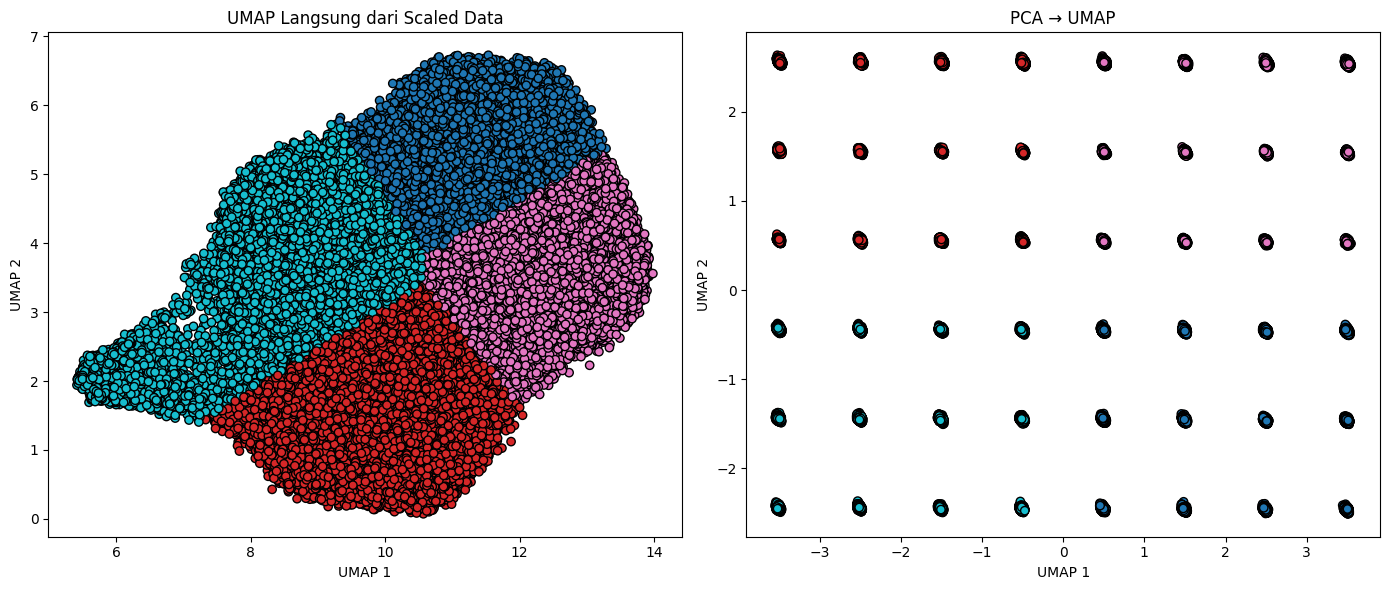

In [85]:
# Clustering (pakai jumlah cluster tetap)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
labels_direct = kmeans.fit_predict(X_umap_direct)
labels_pca = kmeans.fit_predict(X_pca)

# Visualisasi
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X_umap_direct[:, 0], X_umap_direct[:, 1], c=labels_direct, cmap='tab10', edgecolors='k')
axes[0].set_title("UMAP Langsung dari Scaled Data")
axes[0].set_xlabel("UMAP 1")
axes[0].set_ylabel("UMAP 2")

axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='tab10', edgecolors='k')
axes[1].set_title("PCA → UMAP")
axes[1].set_xlabel("UMAP 1")
axes[1].set_ylabel("UMAP 2")

plt.tight_layout()
plt.show()

In [88]:
# Silhouette & DBI untuk UMAP langsung
sil_direct = silhouette_score(X_umap_direct, labels_direct)
dbi_direct = davies_bouldin_score(X_umap_direct, labels_direct)

# Silhouette & DBI untuk PCA + UMAP
sil_pca = silhouette_score(X_pca, labels_pca)
dbi_pca = davies_bouldin_score(X_pca, labels_pca)

print("🔹 UMAP Langsung:")
print(f"   Silhouette Score: {sil_direct:.4f}")
print(f"   Davies-Bouldin Index: {dbi_direct:.4f}")

print("\n🔹 PCA → UMAP:")
print(f"   Silhouette Score: {sil_pca:.4f}")
print(f"   Davies-Bouldin Index: {dbi_pca:.4f}")

🔹 UMAP Langsung:
   Silhouette Score: 0.4408
   Davies-Bouldin Index: 0.8417

🔹 PCA → UMAP:
   Silhouette Score: 0.1194
   Davies-Bouldin Index: 2.3119


In [111]:

# Simpan UMAP dan KMeans sebagai satu dictionary
joblib.dump({
    'umap': umap_direct,
    'kmeans': kmeans
}, 'umap_kmeans_model.pkl')


['umap_kmeans_model.pkl']

In [86]:
knn = NearestNeighbors(n_neighbors=6, metric='cosine')  # termasuk diri sendiri
knn.fit(X_umap_direct)
distances, indices = knn.kneighbors(X_umap_direct)


In [87]:
joblib.dump(knn, 'knn_umap_model.pkl')


['knn_umap_model.pkl']

In [89]:
produk_saya = df_other['Insurance Products Owned'].values

rekomendasi_list = []
for i, tetangga in enumerate(indices):
    produk_aku = produk_saya[i]
    produk_tetangga = produk_saya[tetangga[1:]]  # skip diri sendiri
    rekom = pd.Series(produk_tetangga)[pd.Series(produk_tetangga) != produk_aku].mode()
    rekomendasi_list.append(rekom.iloc[0] if not rekom.empty else None)

df_other['Rekomendasi_KNN_UMAP'] = rekomendasi_list

In [90]:
df_other['Cluster_KMeans_UMAP'] = labels_direct


In [91]:
df_other[['Customer ID', 'Insurance Products Owned', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP']].head()


,Customer ID,Insurance Products Owned,Cluster_KMeans_UMAP,Rekomendasi_KNN_UMAP
0,CUST000001,Life,2,Auto
1,CUST000002,Life,1,Health
2,CUST000003,Home,1,Auto
4,CUST000005,Health,1,Life
5,CUST000006,Travel,3,Home


In [92]:
# Simpan hanya kolom yang relevan ke file Excel
df_rekomendasi = df_other[['Customer ID', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP']]
df_rekomendasi.to_excel('df_rekomendasi_fix.xlsx', index=False)

In [93]:
df_final_merged = final_data.merge(
    df_rekomendasi[['Customer ID', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP']],
    on='Customer ID',
    how='left'  # supaya baris dari final_data tetap utuh meski tidak ada di rekomendasi
)

df_final_merged.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio,Cluster_KMeans_UMAP,Rekomendasi_KNN_UMAP
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662,2.0,Auto
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223,1.0,Health
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666,1.0,Auto
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Active,One-time,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,coastal,0.001727,NaN,NaN
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258,1.0,Life


In [94]:
df_final_merged.to_excel('final_data_fix_with_rekomendasi.xlsx', index=False)


## PREDIKSI PREMIUM AMOUNT DARI PRODUK YANG DIREKOMENDASIKAN

In [101]:

df_reg = df_other.copy()
df_reg['Premium Amount'] = df_reg['Customer ID'].map(final_data.set_index('Customer ID')['Premium Amount'])
df_reg.head()

,Customer ID,Insurance Products Owned,Age,Coverage Amount,Premium Amount,Deductible,Credit Score,Tenure_Days,Interaction_Rate,Premium_Coverage_Ratio,Deductible_Coverage_Ratio,Days_Since_Renewal,Interactions with Customer Service,Education Level,Income Level,Behavioral Data,Policy Type,Purchase History,Risk Profile,Driving Record,Gender_Female,Gender_Male,Gender_Non-Binary,Marital Status_Divorced,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Geographic Information_Rural,Geographic Information_Suburban,Geographic Information_Urban,Preferred Communication Channel_App Notification,Preferred Communication Channel_Email,Preferred Communication Channel_Phone,Preferred Communication Channel_SMS,Preferred Contact Time_Afternoon,Preferred Contact Time_Evening,Preferred Contact Time_Morning,Occupation,Customer Preferences,Previous Claims History,Claim History,Life Events,Segmentation Group,Location_Type,Preferred Language,Rekomendasi_KNN_UMAP,Cluster_KMeans_UMAP
0,CUST000001,Life,-0.304153,-0.797124,2122.99,-0.334406,-0.654562,-0.569699,-0.529271,-0.157198,-0.162772,0.836799,-0.774837,1.0,2.0,1.0,2.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5.0,1.0,4.0,1.0,5.0,2.0,5.0,3.0,Auto,2
1,CUST000002,Life,-1.476698,-1.409381,4928.58,-0.489680,0.019515,0.143429,-0.204347,1.375665,0.255750,0.108381,0.091699,2.0,2.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,5.0,1.0,3.0,2.0,1.0,0.0,1.0,2.0,Health,1
2,CUST000003,Home,0.812557,-0.126935,4528.29,0.422294,-1.158544,1.365933,-0.304023,-0.081476,-0.199059,-0.298398,0.611621,1.0,1.0,3.0,3.0,1.0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,2.0,3.0,2.0,1.0,1.0,1.0,4.0,Auto,1
4,CUST000005,Health,0.365873,1.433850,3892.71,0.969299,-1.473533,1.318549,-0.013076,-0.285861,-0.292232,-0.951136,1.304850,3.0,2.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,Life,1
5,CUST000006,Travel,-1.476698,0.672135,194.72,-1.543809,0.592794,1.214305,-0.196424,-0.436211,-0.425526,0.959779,0.784928,2.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,4.0,2.0,0.0,4.0,0.0,1.0,Home,3


In [102]:
import os


In [103]:

hasil_evaluasi = []
model_per_produk = {}

# Buat folder model jika belum ada
os.makedirs('models_rf', exist_ok=True)

# Grid diperbesar sedikit
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [15, 20, 25],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 0.6, 0.7]
}

for produk in df_reg['Rekomendasi_KNN_UMAP'].dropna().unique():
    data_train = df_reg[df_reg['Insurance Products Owned'] == produk]

    if len(data_train) < 100:
        continue

    X = data_train.drop(columns=[
        'Customer ID', 'Insurance Products Owned', 'Premium Amount',
        'Rekomendasi_KNN_UMAP', 'Cluster_KMeans_UMAP'
    ])
    y = data_train['Premium Amount']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
    search = GridSearchCV(
        base_model,
        param_grid=param_grid,
        cv=3,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=0
    )
    search.fit(X_train, y_train)

    # Pilih model terbaik dengan R2 <= 0.95 dan MAE terkecil
    best_model = None
    best_score = float('inf')
    best_params = None

    for i in range(len(search.cv_results_['params'])):
        params = search.cv_results_['params'][i]
        temp_model = RandomForestRegressor(**params, random_state=42, n_jobs=-1)
        temp_model.fit(X_train, y_train)
        y_pred_temp = temp_model.predict(X_val)
        r2_temp = r2_score(y_val, y_pred_temp)
        mae_temp = mean_absolute_error(y_val, y_pred_temp)

        if r2_temp <= 0.95 and mae_temp < best_score:
            best_score = mae_temp
            best_model = temp_model
            best_params = params

    # Jika tidak ada yang lolos threshold, ambil yang default
    if best_model is None:
        best_model = search.best_estimator_
        best_params = search.best_params_

    # Simpan model ke file
    filename = f'models_rf/model_{produk.replace(" ", "_")}.pkl'
    joblib.dump(best_model, filename)

    model_per_produk[produk] = best_model
    y_pred = best_model.predict(X_val)

    hasil_evaluasi.append({
        'Produk': produk,
        'MAE': mean_absolute_error(y_val, y_pred),
        'RMSE': root_mean_squared_error(y_val, y_pred),
        'R2 Score': r2_score(y_val, y_pred),
        'Train Size': len(X_train),
        'Val Size': len(X_val),
        'Best Params': best_params,
        'Model File': filename
    })

# Hasil evaluasi akhir
df_evaluasi_rf = pd.DataFrame(hasil_evaluasi).sort_values(by='MAE')


In [104]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

df_evaluasi_rf

,Produk,MAE,RMSE,R2 Score,Train Size,Val Size,Best Params,Model File
4,Travel,495.765258,630.476666,0.803128,19916,4980,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 200}",models_rf/model_Travel.pkl
3,Home,500.903570,646.100266,0.790172,20176,5045,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}",models_rf/model_Home.pkl
1,Health,504.012297,638.569365,0.797008,19920,4981,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 150}",models_rf/model_Health.pkl
0,Auto,505.558792,644.579521,0.795980,20111,5028,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 150}",models_rf/model_Auto.pkl
2,Life,509.898605,652.977740,0.783328,19894,4974,"{'max_depth': 25, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'n_estimators': 150}",models_rf/model_Life.pkl


In [115]:
print("\n📌 FEATURE IMPORTANCE PER PRODUK:\n")

for produk, model in model_per_produk.items():
    print(f"🔹 Produk: {produk}")
    fitur = model.feature_names_in_ if hasattr(model, 'feature_names_in_') else X_train.columns
    importances = model.feature_importances_
    
    # Gabungkan dan urutkan
    importance_sorted = sorted(zip(fitur, importances), key=lambda x: x[1], reverse=True)
    
    for fitur, score in importance_sorted:
        print(f"   - {fitur:<30}: {score:.4f}")
    
    print("-" * 50)



📌 FEATURE IMPORTANCE PER PRODUK:

🔹 Produk: Auto
   - Premium_Coverage_Ratio        : 0.6147
   - Coverage Amount               : 0.0827
   - Deductible_Coverage_Ratio     : 0.0451
   - Deductible                    : 0.0239
   - Credit Score                  : 0.0193
   - Tenure_Days                   : 0.0187
   - Days_Since_Renewal            : 0.0183
   - Interaction_Rate              : 0.0179
   - Age                           : 0.0161
   - Interactions with Customer Service: 0.0119
   - Occupation                    : 0.0095
   - Life Events                   : 0.0080
   - Location_Type                 : 0.0074
   - Preferred Language            : 0.0073
   - Segmentation Group            : 0.0073
   - Previous Claims History       : 0.0072
   - Behavioral Data               : 0.0067
   - Policy Type                   : 0.0062
   - Education Level               : 0.0061
   - Customer Preferences          : 0.0061
   - Income Level                  : 0.0050
   - Claim History    

In [105]:
if 'Rekomendasi_Premi' in df_reg.columns:
    df_reg.drop(columns='Rekomendasi_Premi', inplace=True)


In [106]:
df_reg['Rekomendasi_Premi'] = np.nan

# Drop cols (termasuk Rekomendasi_Premi aman sekarang)
drop_cols = [
    'Customer ID', 'Insurance Products Owned', 'Premium Amount',
    'Rekomendasi_KNN_UMAP', 'Cluster_KMeans_UMAP', 'Rekomendasi_Premi'
]

for produk, model in model_per_produk.items():
    data_target = df_reg[df_reg['Rekomendasi_KNN_UMAP'] == produk]

    if len(data_target) == 0:
        continue

    X_target = data_target.drop(columns=[col for col in drop_cols if col in data_target.columns])
    y_pred = model.predict(X_target)
    y_pred = np.maximum(y_pred, 0)  # optional: jaga-jaga nilai negatif
    df_reg.loc[data_target.index, 'Rekomendasi_Premi'] = y_pred

In [107]:
df_reg[['Customer ID', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP', 'Rekomendasi_Premi']].head()

,Customer ID,Cluster_KMeans_UMAP,Rekomendasi_KNN_UMAP,Rekomendasi_Premi
0,CUST000001,2,Auto,2614.016523
1,CUST000002,1,Health,3230.492386
2,CUST000003,1,Auto,3689.324472
4,CUST000005,1,Life,3381.033112
5,CUST000006,3,Home,902.652820


In [131]:
df_rekomendasi_premi_fix = df_reg[['Customer ID', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP', 'Rekomendasi_Premi']]
df_rekomendasi_premi_fix.to_excel('df_rekomendasi_premi_fix.xlsx', index=False)

In [132]:
# Gabungkan berdasarkan 'Customer ID'
df_finalpremi_merged = final_data.merge(
    df_rekomendasi_premi_fix[['Customer ID', 'Cluster_KMeans_UMAP', 'Rekomendasi_KNN_UMAP', 'Rekomendasi_Premi']],
    on='Customer ID',
    how='left'  # supaya baris dari final_data tetap utuh meski tidak ada di rekomendasi
)

df_finalpremi_merged.head()

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio,Cluster_KMeans_UMAP,Rekomendasi_KNN_UMAP,Rekomendasi_Premi
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662,2.0,Auto,2614.016523
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223,1.0,Health,3230.492386
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666,1.0,Auto,3689.324472
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Active,One-time,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,coastal,0.001727,NaN,NaN,NaN
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258,1.0,Life,3381.033112


In [133]:
df_finalpremi_merged.to_excel('final_data_fix_with_rekomendasipremi.xlsx', index=False)

In [134]:
df_finalpremi_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 36 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Customer ID                         150000 non-null  object 
 1   Age                                 150000 non-null  int64  
 2   Gender                              150000 non-null  object 
 3   Marital Status                      150000 non-null  object 
 4   Occupation                          150000 non-null  object 
 5   Income Level                        150000 non-null  object 
 6   Education Level                     150000 non-null  object 
 7   Geographic Information              150000 non-null  object 
 8   Behavioral Data                     150000 non-null  object 
 9   Purchase History                    150000 non-null  object 
 10  Claim History                       150000 non-null  object 
 11  Interactions with Customer

In [9]:
final_data['Insurance Products Owned'].value_counts().to_dict()

{'Home': 25221,
 'Auto': 25139,
 'Multiple': 24975,
 'Health': 24901,
 'Travel': 24896,
 'Life': 24868}

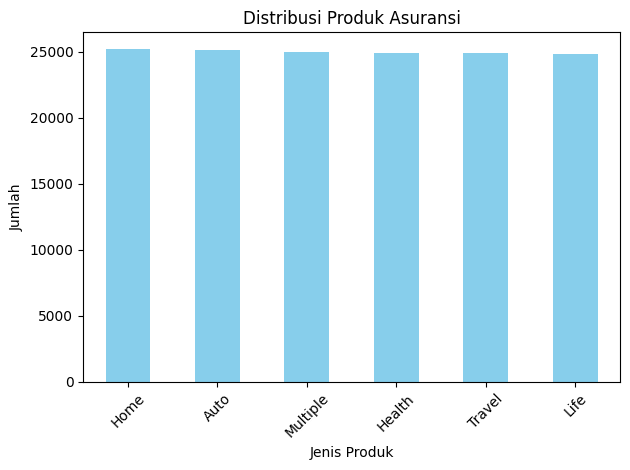

In [8]:
import matplotlib.pyplot as plt
product_dist = final_data['Insurance Products Owned'].value_counts()

product_dist.plot(kind='bar', color='skyblue')
plt.title('Distribusi Produk Asuransi')
plt.xlabel('Jenis Produk')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [10]:
final_data.groupby('Cluster_KMeans_UMAP')['Rekomendasi_Premi'].mean().round(1).to_dict()

{0.0: 2547.8, 1.0: 2523.6, 2.0: 2538.3, 3.0: 2566.7}

In [136]:
df_finalpremi_merged

,Customer ID,Age,Gender,Marital Status,Occupation,Income Level,Education Level,Geographic Information,Behavioral Data,Purchase History,Claim History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Deductible,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Risk Profile,Previous Claims History,Credit Score,Driving Record,Life Events,Segmentation Group,Tenure_Days,Days_Since_Renewal,Interaction_Rate,Deductible_Coverage_Ratio,Location_Type,Premium_Coverage_Ratio,Cluster_KMeans_UMAP,Rekomendasi_KNN_UMAP,Rekomendasi_Premi
0,CUST000001,43,Female,Married,Student,Medium,High School,Suburban,Inactive,Frequent,3+ Claims,5,Life,277063,2122.99,868.09,Quarterly,Eco-Friendly,SMS,Morning,Mandarin,Low,4,470,Minor Violations,Retirement,C,860,275,0.005807,0.003133,regional,0.007662,2.0,Auto,2614.016523
1,CUST000002,22,Female,Married,Student,Medium,Master,Urban,Unknown,One-time,No Claims,10,Life,102202,4928.58,782.75,Semi-Annual,Eco-Friendly,Email,Evening,Indonesian,Low,3,577,Clean,Divorce,A,1161,198,0.008606,0.007659,historic,0.048223,1.0,Health,3230.492386
2,CUST000003,63,Male,Divorced,Retired,Low,High School,Urban,Occasional,Infrequent,No Claims,13,Home,468469,4528.29,1283.98,Semi-Annual,Fast Service,Phone,Morning,Spanish,Medium,3,390,Major Violations,Divorce,B,1677,155,0.007747,0.002741,historic,0.009666,1.0,Auto,3689.324472
3,CUST000004,60,Female,Widowed,Business Owner,High,Bachelor,Suburban,Active,One-time,No Claims,13,Multiple,819239,1415.09,1502.43,Monthly,Eco-Friendly,Phone,Evening,Spanish,Low,4,662,Minor Violations,Marriage,D,1361,299,0.009545,0.001834,coastal,0.001727,NaN,NaN,NaN
4,CUST000005,55,Male,Married,Teacher,Medium,PhD,Suburban,Active,Infrequent,1-2 Claims,17,Health,914230,3892.71,1584.62,Annual,Comprehensive Coverage,SMS,Morning,French,Low,0,340,Major Violations,Childbirth,B,1657,86,0.010253,0.001733,historic,0.004258,1.0,Life,3381.033112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,CUST149996,20,Female,Divorced,Business Owner,High,Bachelor,Urban,Occasional,One-time,3+ Claims,12,Multiple,243014,1430.08,1502.58,Annual,Fast Service,Phone,Morning,French,Low,0,484,Clean,Marriage,A,1239,345,0.009677,0.006183,landscape,0.005885,NaN,NaN,NaN
149996,CUST149997,19,Female,Married,Retired,High,PhD,Rural,New,Infrequent,No Claims,8,Home,564522,1093.55,1995.50,Annual,Eco-Friendly,SMS,Afternoon,Spanish,Low,1,789,Minor Violations,Divorce,D,1114,114,0.007175,0.003535,regional,0.001937,2.0,Auto,1312.399960
149997,CUST149998,57,Male,Married,Teacher,Medium,High School,Suburban,Active,Frequent,3+ Claims,7,Home,658445,4999.39,141.81,Annual,Comprehensive Coverage,Email,Afternoon,Spanish,High,1,337,Clean,Childbirth,A,545,47,0.012821,0.000215,historic,0.007593,1.0,Auto,3762.423377
149998,CUST149999,44,Male,Single,Engineer,Medium,Master,Suburban,Occasional,Frequent,3+ Claims,18,Travel,956797,3759.32,255.34,Annual,Low Cost,Email,Evening,Spanish,Low,2,548,Major Violations,Retirement,E,1194,316,0.015063,0.000267,historic,0.003929,3.0,Health,3556.971192
